# Greenhouse Gases Data Visualization with Matplotlib

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* global relative temprature data

https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/

In [2]:
# Importing course datasets as DataFrames

df = pd.read_csv('greenhouse_gases.csv', parse_dates=["date"], index_col="date")
df.head()

,relative_temp,co2,ch4,n2o,sf6
date,,,,,
2001-01-01,0.47,370.68,1772.86,316.30,4.69
2001-02-01,0.41,371.18,1772.50,316.31,4.71
2001-03-01,0.65,371.59,1773.63,316.21,4.73
2001-04-01,0.59,371.90,1773.84,316.12,4.75
2001-05-01,0.62,371.80,1770.73,316.11,4.76


------------------

### Observation of Dataframe 

In [3]:
def get_info(dataframe):
    
    print("----- shape -----")
    print("shape: ",dataframe.shape)
    
    print("-----null -----")
    print(dataframe.isnull().sum())
    
    print("------info----------")
    print(dataframe.info())
    
    print("------num cols------------")
    num_cols = dataframe.select_dtypes(include="number").columns
    print(num_cols.values)
    
    print("------head and tail----------")
    print(dataframe.head(2))
    print(dataframe.tail(2))
    
    

In [4]:
get_info(df)

----- shape -----
shape:  (257, 5)
-----null -----
relative_temp    0
co2              0
ch4              0
n2o              0
sf6              0
dtype: int64
------info----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2001-01-01 to 2022-05-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   relative_temp  257 non-null    float64
 1   co2            257 non-null    float64
 2   ch4            257 non-null    float64
 3   n2o            257 non-null    float64
 4   sf6            257 non-null    float64
dtypes: float64(5)
memory usage: 12.0 KB
None
------num cols------------
['relative_temp' 'co2' 'ch4' 'n2o' 'sf6']
------head and tail----------
            relative_temp     co2      ch4     n2o   sf6
date                                                    
2001-01-01           0.47  370.68  1772.86  316.30  4.69
2001-02-01           0.41  371.18  1772.50  316.31  4.71
            rela

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_temp,257.0,0.727821,0.171101,0.27,0.60,0.70,0.84,1.31
co2,257.0,392.288482,13.736555,368.32,380.53,391.13,404.16,418.52
ch4,257.0,1815.282646,40.181021,1762.73,1779.58,1803.60,1847.20,1909.97
n2o,257.0,324.722918,5.643241,316.11,319.70,324.24,329.46,335.47
sf6,257.0,7.530584,1.842827,4.69,5.89,7.33,9.10,10.99


-------------------------

## A - plt

### 1- Graph via Basic plt commands

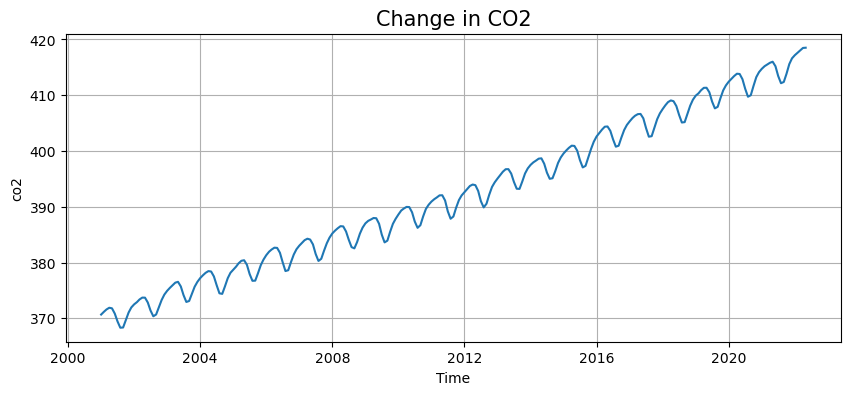

In [6]:
plt.figure(figsize =(10,4))

plt.plot(df.index, df["co2"])

plt.xlabel("Time")

plt.ylabel("co2")

plt.title("Change in CO2",  size = 15)

plt.grid()

plt.show()

### 2 - Graph - Detailed plt commands

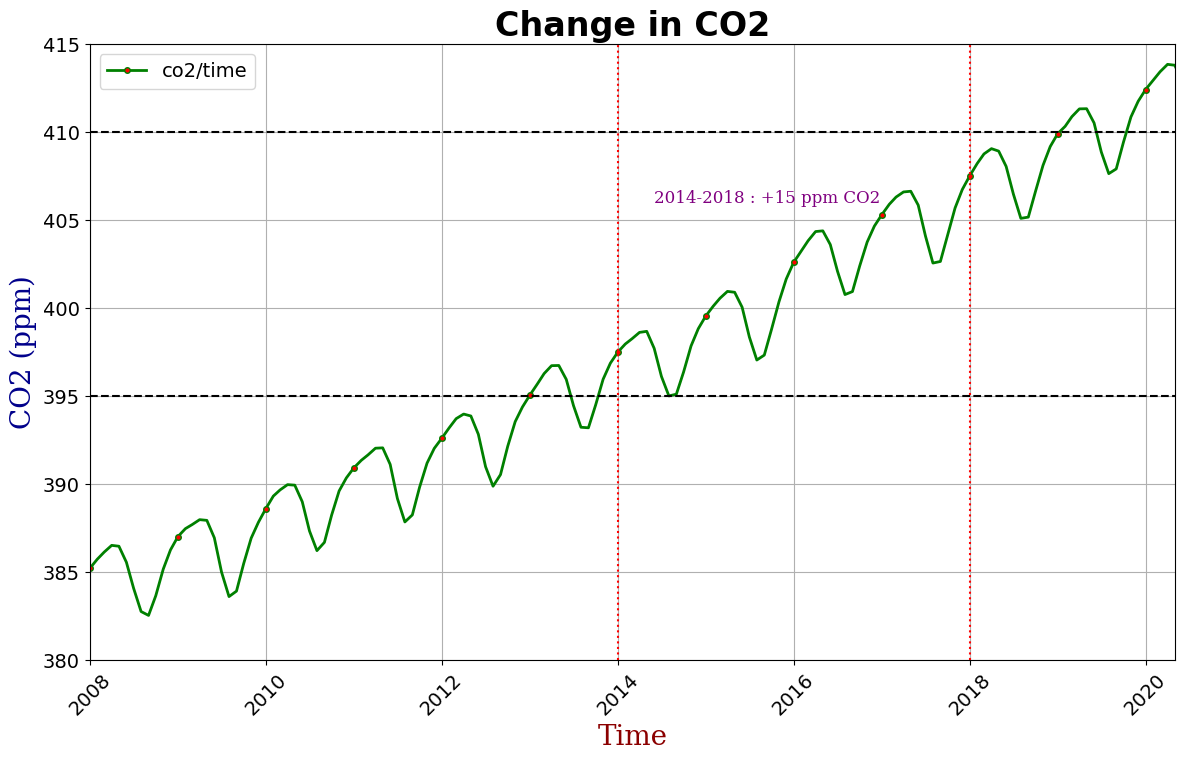

In [7]:
# CO2 changing in Time

# figsize 
plt.figure(figsize =(14,8))

# plot
plt.plot(df.index,df["co2"], 
         linestyle="-", linewidth=2, color = "green",
         marker = ".", markersize = 8,  markerfacecolor = "red", markevery = 12,
        label = "co2/time")

# font dictionary to use in label adjustment
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
# axes labels
plt.xlabel("Time", fontdict = font)
plt.ylabel("CO2 (ppm)", fontdict = font, color ="darkblue")

# axec ticks
plt.xticks(rotation=45, size = 14)
plt.yticks(size = 14)

# dashed horizontal lines
plt.axhline(y=395, color="black", linestyle="--")
plt.axhline(y=410, color="black", linestyle="--")

# dashed vertical lines
plt.axvline(x=pd.Timestamp("2014"), color="red", linestyle=":")
plt.axvline(x=pd.Timestamp("2018"), color="red", linestyle=":")

# main title
plt.title("Change in CO2", size = 24, weight="bold")

# text in graph with its location
plt.text(pd.Timestamp("2014-06"),406, '2014-2018 : +15 ppm CO2', color = "purple", size = 12, family = "serif" )

# grid
plt.grid()

# legend, to show legend you need to describe "label"  in plt.plot()
plt.legend(fontsize=14)

# axes limits to show
plt.xlim(pd.Timestamp("2008-01"),pd.Timestamp("2020-05"))
plt.ylim(380,415)

plt.show()

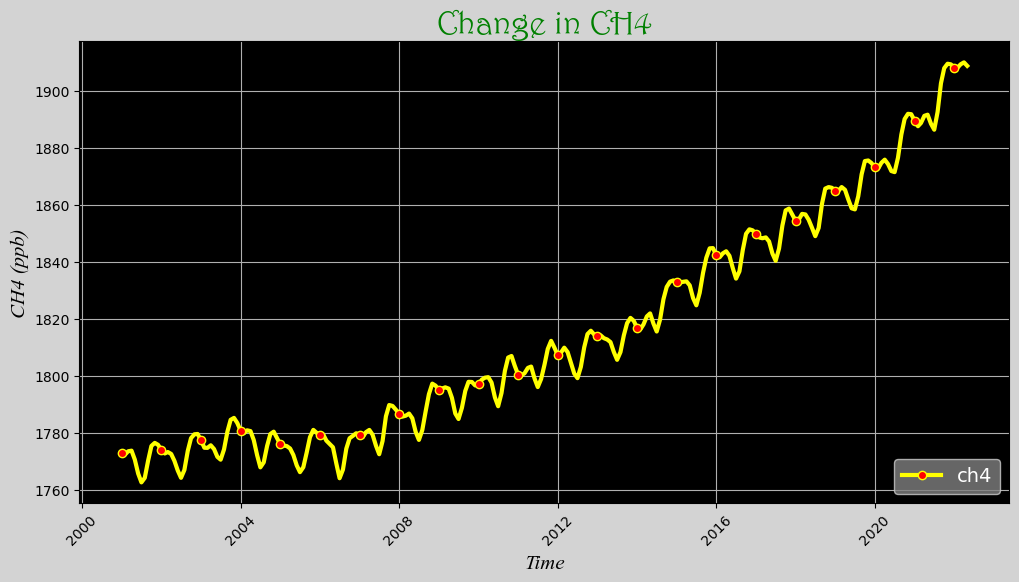

In [8]:
# CH4 Chnaging in Time

plt.figure(figsize = (12,6), facecolor="lightgrey")

# background color
plt.rcParams['axes.facecolor'] = 'black'

# plot CH4
plt.plot(df.index,df["ch4"], 
         linestyle="-", linewidth=3, color = "yellow", 
         marker = ".", markersize = 12, markerfacecolor = "red", markevery = 12,
         label = "ch4")

# axes labels
plt.xlabel("Time", font = "Times New Roman", style = "italic", size = 15)
plt.ylabel("CH4 (ppb)", font = "Times New Roman", style = "italic", size = 15)

# axes ticks 
plt.xticks(rotation = 45, size = 10)
plt.yticks(size = 10)

# graph title
plt.title("Change in CH4", font = "Harrington", size = 24, color = "g")

# put grid
plt.grid()

# put legend, to show legend you need to describe "label"  in plt.plot()
plt.legend(fontsize=14, loc ="lower right",  facecolor = "grey", fancybox =True, labelcolor = "w")

plt.show()

------------------

## a function for basic plt

In [9]:
def plt_graph(x, y, figsize= (12,6), x_label = "", y_label ="", title="",title_size = 20, label_size=15, color = "black", grid = True, legend = True):
    
    plt.style.use('default')
    
    plt.figure(figsize = figsize)

    plt.plot(x, y , color = color, label = y.name)

    plt.xlabel(x_label, size= label_size)

    plt.ylabel(y_label, size = label_size)

    plt.title(title, size = title_size)
    
    if legend:
    
        plt.legend()
    
    if grid:
        
        plt.grid()

    plt.show()

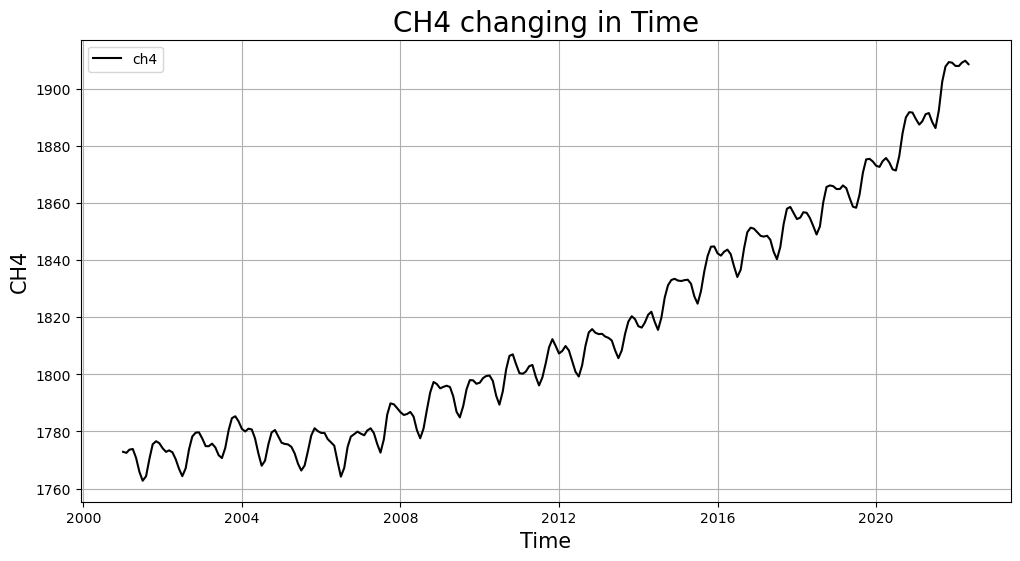

In [10]:
plt_graph(df.index, df.ch4, x_label = "Time", y_label="CH4", title = "CH4 changing in Time")

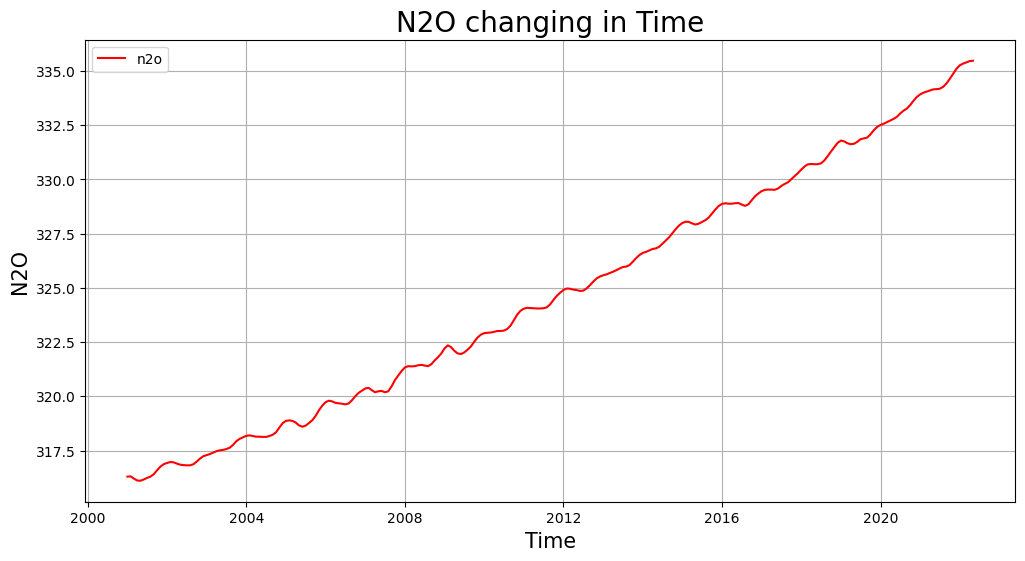

In [11]:
plt_graph(df.index, df.n2o, x_label = "Time", y_label="N2O", title = "N2O changing in Time",color ="r")

-----------------

## B - fig, ax

### 1 - Graph via simple commands

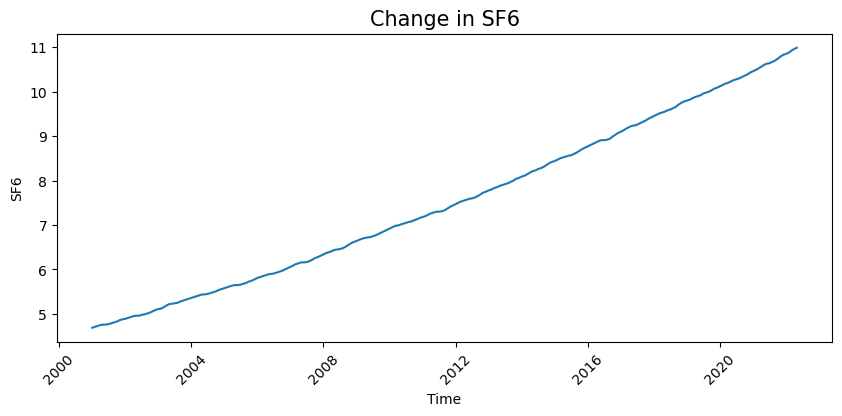

In [12]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(df.index, df["sf6"])

ax.set_xlabel("Time")

ax.set_ylabel("SF6")

ax.set_title("Change in SF6", size = 15)

plt.xticks(rotation=45)

plt.show()

--------------------

### 2 - Graphs side by side

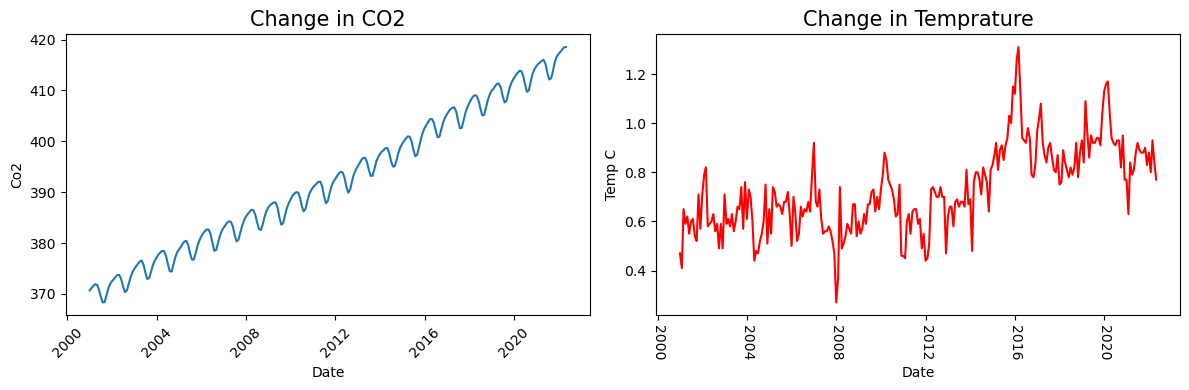

In [13]:
# 1 row, 2 columns
fig, ax = plt.subplots(1,2, figsize =(12,4))

# first graph
ax[0].plot(df.index, df["co2"])
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Co2")
ax[0].set_title("Change in CO2", size = 15)
ax[0].tick_params(axis='x', rotation=45)

# second graph
ax[1].plot(df.index, df["relative_temp"], color = "r")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temp C")
ax[1].set_title("Change in Temprature", size = 15)
ax[1].tick_params(axis='x', rotation = 270)

# tight the graphs
plt.tight_layout()

plt.show()

----------------------

### 3 - Graphs one after the other

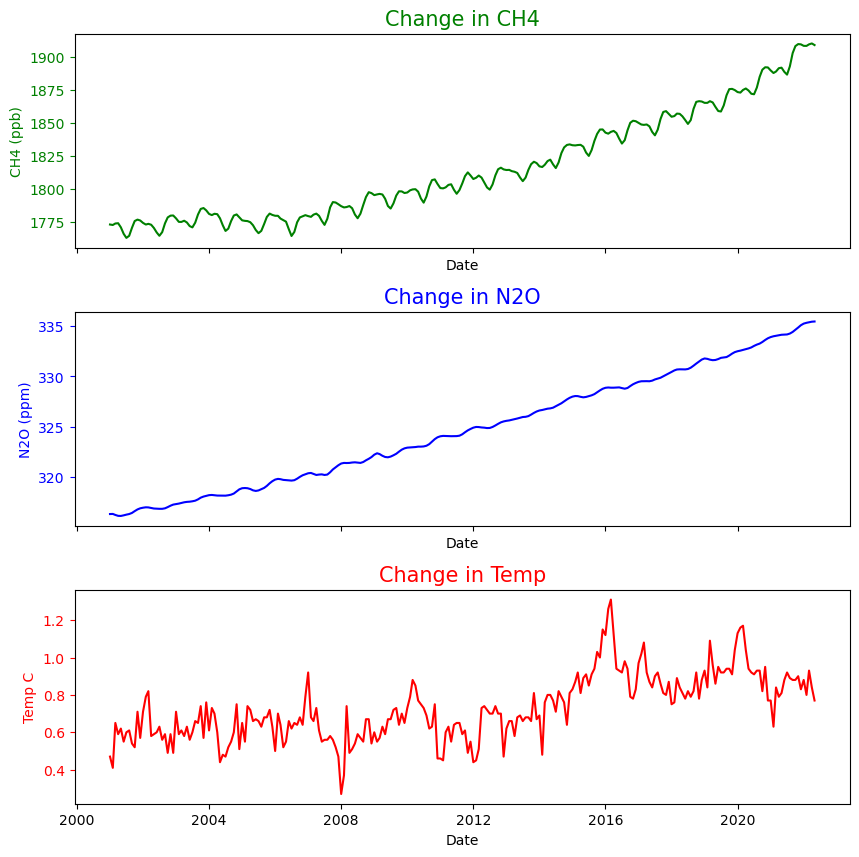

In [14]:
# 3 rows, 1 column, shared x axes 
fig, ax = plt.subplots(3,1, figsize = (10,10), sharex = True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)

# first graph
ax[0].plot(df.index, df["ch4"], color ="g")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("CH4 (ppb)", color="g")
ax[0].set_title("Change in CH4", size = 15, color="g")
ax[0].tick_params("y", colors="g")

# second graph
ax[1].plot(df.index, df["n2o"], color = "b")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("N2O (ppm)", color="b")
ax[1].set_title("Change in N2O", size = 15, color="b")
ax[1].tick_params("y", colors="b")

# third graph
ax[2].plot(df.index, df["relative_temp"], color = "red")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Temp C", color ="r")
ax[2].set_title("Change in Temp", size = 15, color = "r")
ax[2].tick_params("y", colors="r")

plt.show()

-----------

### 4 - two variables with their own axes in one graph

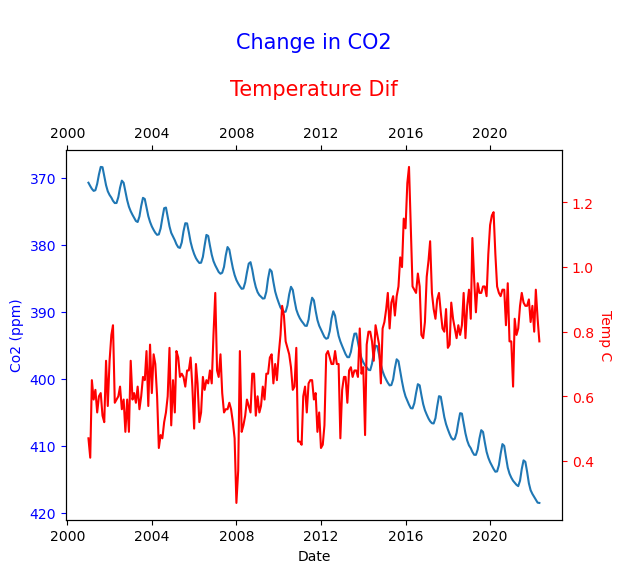

In [15]:
fig, ax = plt.subplots()

# Co2
ax.plot(df.index, df["co2"])
ax.set_xlabel("Date")
ax.set_ylabel("Co2 (ppm)", color="b")
ax.set_title("\nChange in CO2\n\n\n", size = 15, color="b")
ax.tick_params("y", colors="b")

#invert y axis (from big to small)
ax.invert_yaxis() 

# tick on the top and bottom
ax.tick_params(labelbottom=True,labeltop=True) 
ax.xaxis.set_ticks_position("both") 

# make double axes
ax2 = ax.twinx()

# Temperature
ax2.plot(df.index, df["relative_temp"], color = "red")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temp C", rotation=270,color ="r")
ax2.set_title("Temperature Dif\n", size = 15, color = "r")
ax2.tick_params("y", colors="r")
ax2.yaxis.set_label_coords(1.1, .5)

plt.xticks(rotation = 45)
plt.show()

-----------------

### 5 - Graphs 

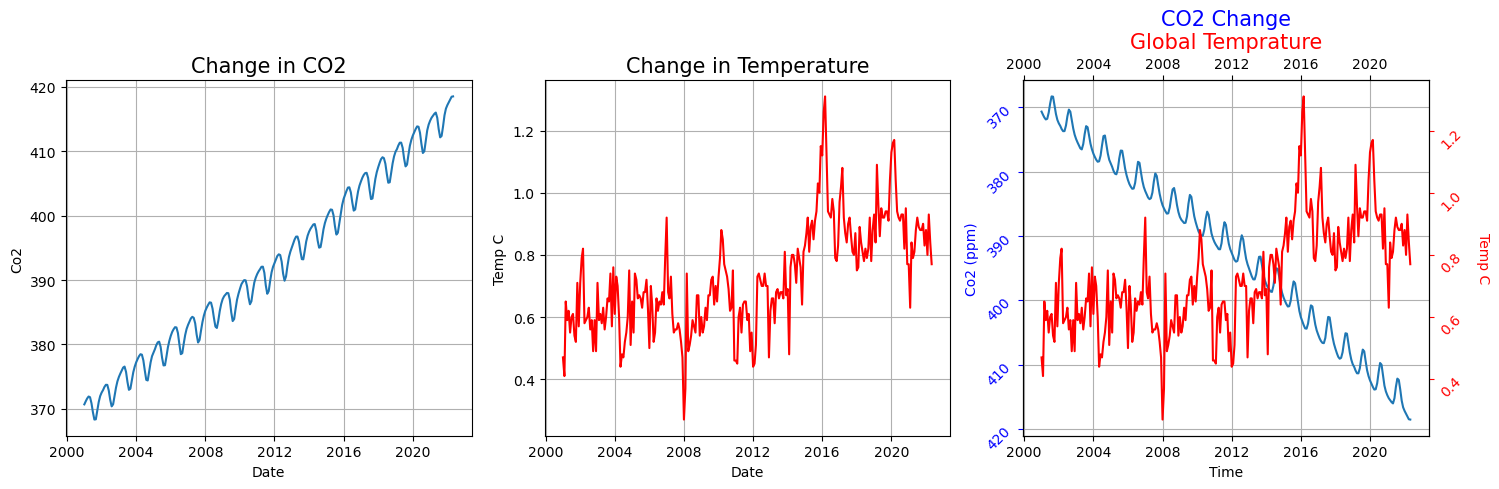

In [16]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

# 1. graph
ax[0].plot(df.index, df["co2"])
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Co2")
ax[0].set_title("Change in CO2", size = 15)
ax[0].grid(True)
# -----------------------------------------------------
# 2. graph
ax[1].plot(df.index, df["relative_temp"], color = "r")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temp C")
ax[1].set_title("Change in Temperature", size = 15)
ax[1].grid(True)
# -----------------------------------------------------

# 3. graph
ax[2].plot(df.index, df["co2"])
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Co2 (ppm)", color="b")
ax[2].set_title("CO2 Change\n", size = 15, color="b")
ax[2].tick_params("y", colors="b",rotation=45)
ax[2].grid(True)


ax[2].invert_yaxis() 

ax[2].tick_params(labelbottom=True,labeltop=True) 
ax[2].xaxis.set_ticks_position("both") 


ax3 = ax[2].twinx()

ax3.plot(df.index, df["relative_temp"], color = "red")
ax3.set_ylabel("Temp C", rotation=270,color ="r")
ax3.set_title("Global Temprature", size = 15, color = "r")
ax3.tick_params("y", colors="r",rotation = 45)
ax3.yaxis.set_label_coords(1.15, .5)
# ------------------------------------------

plt.tight_layout()
plt.show();

---------------------

### A function for plot line

In [17]:
def plot_line(axes, x, y, figsize=(10,5), title="", title_size=15,  grid=False, invert_axes = False, color ="blue", tick_top = False,
              x_label="", y_label="", y_rotation=0, x_rotation=0,  x_label_color="black", 
              x_tick_color="black", y_label_color="blue", y_tick_color = "blue"):
  
    axes.plot(x, y, color = color)
      
    axes.set_xlabel(x_label, color = x_label_color)
    
    axes.set_ylabel(y_label, color= y_label_color)
    
    
    axes.tick_params("x", colors=x_tick_color, rotation=x_rotation)
    
    axes.tick_params("y", colors=y_tick_color, rotation=y_rotation)
    
    
    axes.set_title(title, size= title_size)
    
    # if you want to grid
    if grid: 
        
        axes.grid()
        
    # if you want to invert y axes   
    if invert_axes:
        
        axes.invert_yaxis() 
        
    # # if you want label on top    
    if tick_top:
        
        axes.tick_params(labelbottom=True, labeltop=True) 
        
        axes.xaxis.set_ticks_position("both") 

### use function

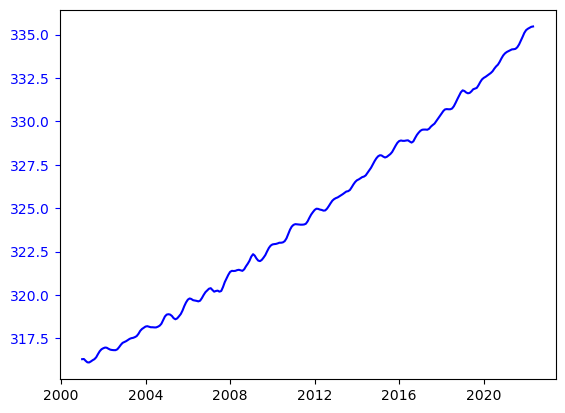

In [18]:
fig, ax = plt.subplots()

plot_line(axes=ax, x = df.index.date, y = df["n2o"])

plt.show();

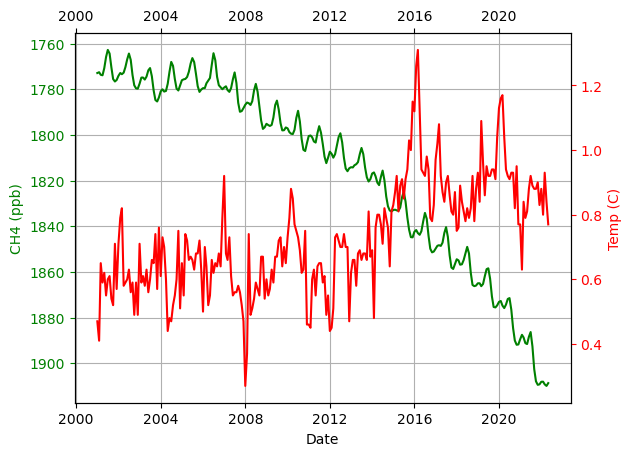

In [19]:
fig, ax = plt.subplots()

plot_line(axes = ax, x = df.index.date, y = df["ch4"], x_label = "Date", y_label="CH4 (ppb)", grid=True,
         color = "g", y_label_color="g", y_tick_color="g", invert_axes =True, tick_top = True)

ax2 = ax.twinx()

plot_line(axes = ax2, x = df.index.date, y = df["relative_temp"], 
          y_label="Temp (C)",color = "r", y_label_color="r", y_tick_color="r")

plt.show()

------------------------

## only 2010 data visualization

In [20]:
df_2010 = df.loc["2010"]
df_2010.head(12)

,relative_temp,co2,ch4,n2o,sf6
date,,,,,
2010-01-01,0.73,388.62,1797.10,322.91,6.92
2010-02-01,0.79,389.33,1798.75,322.93,6.95
2010-03-01,0.88,389.68,1799.43,322.94,6.98
2010-04-01,0.85,389.98,1799.61,322.97,6.99
2010-05-01,0.77,389.95,1797.73,323.01,7.01
2010-06-01,0.75,389.01,1792.52,323.01,7.03
2010-07-01,0.73,387.35,1789.41,323.03,7.05
2010-08-01,0.69,386.23,1794.07,323.10,7.07
2010-09-01,0.62,386.70,1801.79,323.26,7.08


### two variables in one graph 

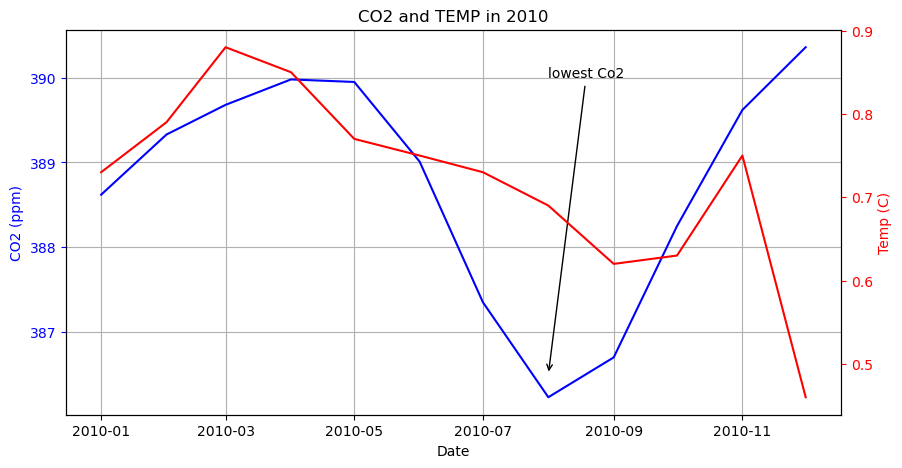

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

plot_line(axes = ax, x = df_2010.index, y = df_2010["co2"], x_label = "Date", y_label="CO2 (ppm)", grid=True)

ax2 = ax.twinx()

plot_line(axes = ax2, x = df_2010.index, y = df_2010["relative_temp"], y_label="Temp (C)",color = "r", 
          y_label_color="r", y_tick_color="r")

ax.annotate("lowest Co2",
            xy = (pd.Timestamp("2010-08"),386.5),
            xytext = (pd.Timestamp("2010-08"), 390),
            arrowprops={"arrowstyle":"->","color":"black"})

plt.title("CO2 and TEMP in 2010")
plt.show()

### Drawing all variables within different axes using "plot_line" function

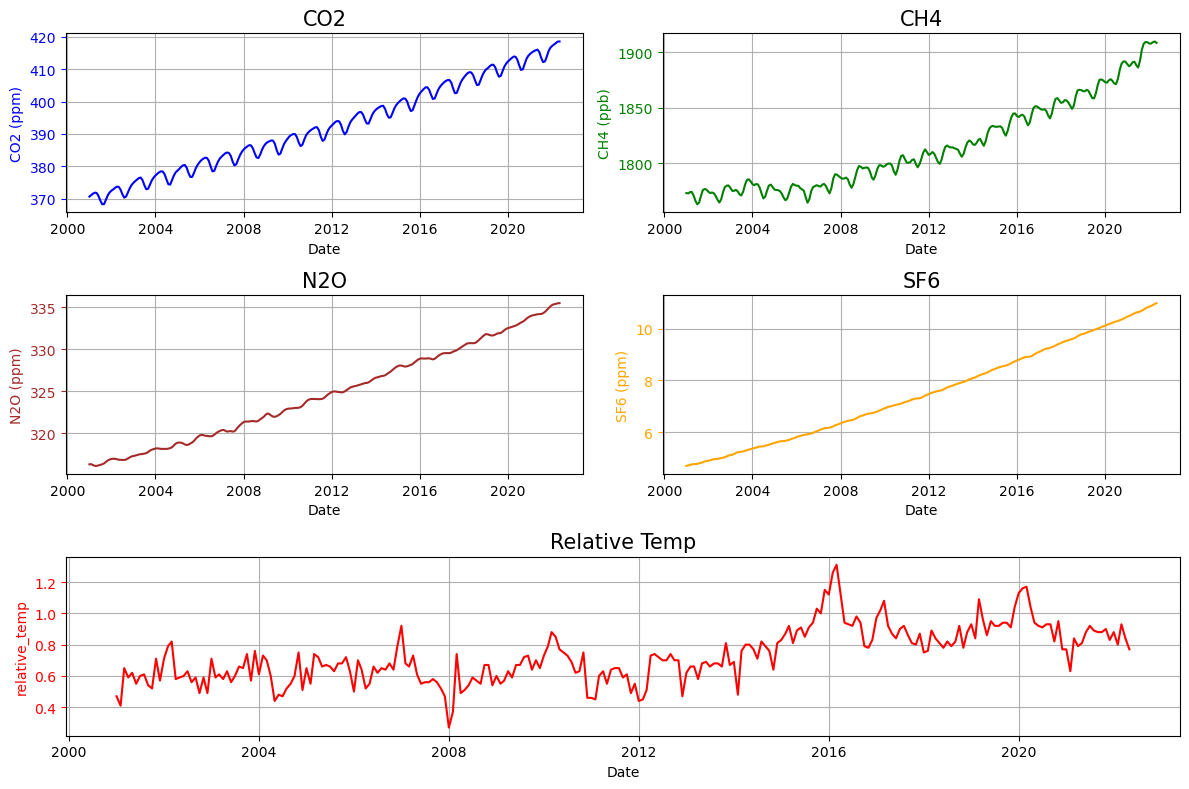

In [22]:
fig,ax = plt.subplots(figsize = (12,8))

ax1 = plt.subplot(321) # 3x2 grid 1. graph
plot_line(axes = ax1, x = df.index.date, y = df["co2"], x_label = "Date", y_label="CO2 (ppm)", grid=True,
         color = "b", y_label_color="b", y_tick_color="b", title = "CO2")

ax2 = plt.subplot(322) # 3x2 grid 2. graph
plot_line(axes = ax2, x = df.index.date, y = df["ch4"], x_label = "Date", y_label="CH4 (ppb)", grid=True,
         color = "g", y_label_color="g", y_tick_color="g",title = "CH4")

ax3 = plt.subplot(323) # 3x2 grid 3. graph
plot_line(axes = ax3, x = df.index.date, y = df["n2o"], x_label = "Date", y_label="N2O (ppm)", grid=True,
         color = "brown", y_label_color="brown", y_tick_color="brown",title = "N2O")

ax4 = plt.subplot(324) # 3x2 grid 4. graph
plot_line(axes = ax4, x = df.index.date, y = df["sf6"], x_label = "Date", y_label="SF6 (ppm)", grid=True,
         color = "orange", y_label_color="orange", y_tick_color="orange",title = "SF6")

ax5 = plt.subplot(313) # 3x1 grid 3. graph
plot_line(axes = ax5, x = df.index.date, y = df["relative_temp"], x_label = "Date", y_label="relative_temp", grid=True,
         color = "red", y_label_color="red", y_tick_color="red",title = "Relative Temp")

plt.tight_layout()

plt.show()